In [152]:
# ANN Building and Visualization Imports
import keras
from keras import backend as K
from keras import optimizers, losses
from keras.engine.topology import Layer
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import tensorflow as tf
from keras.callbacks import LambdaCallback
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle




# Standard Imports
import pandas as pd
import numpy as np
import math

# Initializations
RF_size = 6

In [153]:
inputs = pd.read_csv('binary_shapes.csv')
inputs = inputs.drop('X1', axis = 0) # Taking out col names
inputs = inputs.apply(pd.to_numeric)  # converting to floats

inputs = inputs.values # convert to np ndarray
inputs = inputs.reshape(955, 50, 50, 1)
flattened_inputs = inputs.reshape(955, 2500)

In [154]:
labels = pd.read_csv('binary_shapes_labels.csv')
labels = labels.drop('x', axis = 0)
labels = labels.apply(pd.to_numeric)
labels = labels.values
labels = to_categorical(labels)

In [155]:
inputs, labels = shuffle(inputs, labels)

In [156]:
model = Sequential()
model.add(Conv2D(input_shape = (50,50,1), filters=52, kernel_size = RF_size, strides = RF_size, activation = 'relu'))
model.add(Flatten())
model.add(Dense(39, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 8, 8, 52)          1924      
_________________________________________________________________
flatten_12 (Flatten)         (None, 3328)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 39)                129831    
Total params: 131,755
Trainable params: 131,755
Non-trainable params: 0
_________________________________________________________________


In [157]:
model.compile(optimizer = optimizers.adam(lr = 0.0001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [158]:
history = model.fit(x = inputs, validation_split = 0.25, y = labels, batch_size = 50, epochs = 100)

Train on 716 samples, validate on 239 samples
Epoch 1/100
716/716 [==============================] - 1s 1ms/step - loss: 3.5742 - acc: 0.0433 - val_loss: 3.5350 - val_acc: 0.0586
Epoch 2/100
716/716 [==============================] - 0s 319us/step - loss: 3.4658 - acc: 0.0852 - val_loss: 3.4463 - val_acc: 0.0795
Epoch 3/100
716/716 [==============================] - 0s 336us/step - loss: 3.3639 - acc: 0.1271 - val_loss: 3.3511 - val_acc: 0.1674
Epoch 4/100
716/716 [==============================] - 0s 335us/step - loss: 3.2542 - acc: 0.1830 - val_loss: 3.2509 - val_acc: 0.1841
Epoch 5/100
716/716 [==============================] - 0s 390us/step - loss: 3.1289 - acc: 0.2221 - val_loss: 3.1237 - val_acc: 0.2636
Epoch 6/100
716/716 [==============================] - 0s 362us/step - loss: 2.9712 - acc: 0.2793 - val_loss: 2.9713 - val_acc: 0.2720
Epoch 7/100
716/716 [==============================] - 0s 350us/step - loss: 2.7899 - acc: 0.3240 - val_loss: 2.7879 - val_acc: 0.3264
Epoch 8/100

Epoch 61/100
716/716 [==============================] - 0s 311us/step - loss: 0.2417 - acc: 0.9455 - val_loss: 0.5855 - val_acc: 0.8577
Epoch 62/100
716/716 [==============================] - 0s 316us/step - loss: 0.2334 - acc: 0.9595 - val_loss: 0.5795 - val_acc: 0.8661
Epoch 63/100
716/716 [==============================] - 0s 291us/step - loss: 0.2321 - acc: 0.9525 - val_loss: 0.5832 - val_acc: 0.8661
Epoch 64/100
716/716 [==============================] - 0s 287us/step - loss: 0.2298 - acc: 0.9581 - val_loss: 0.5785 - val_acc: 0.8619
Epoch 65/100
716/716 [==============================] - 0s 312us/step - loss: 0.2216 - acc: 0.9581 - val_loss: 0.5824 - val_acc: 0.8661
Epoch 66/100
716/716 [==============================] - 0s 314us/step - loss: 0.2202 - acc: 0.9567 - val_loss: 0.5754 - val_acc: 0.8661
Epoch 67/100
716/716 [==============================] - 0s 316us/step - loss: 0.2147 - acc: 0.9637 - val_loss: 0.5705 - val_acc: 0.8619
Epoch 68/100
716/716 [==========================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


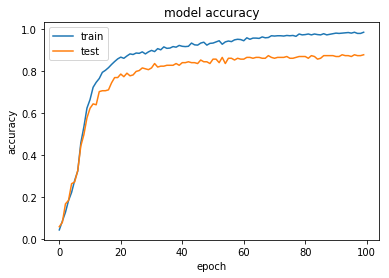

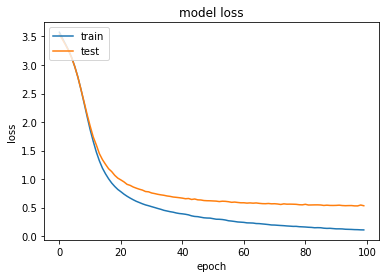

In [159]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()